In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import cv2
from google.colab.patches import cv2_imshow

### Detecting Outliers

In [60]:
# plt.figure(figsize=(10,8),dpi=150)
# sns.displot(data = df, bins = 30)
# plt.xticks(rotation=45)

In [61]:
# plt.figure(figsize=(12,15),dpi=180)
# sns.boxplot(data = df)
# plt.xticks(rotation=45)

In [62]:
# df.describe()

In [63]:
# calculating IQR for saleprice
# df[(df[feature] < Q1 - threshold * IQR) | (df[feature] > Q3 + threshold * IQR)]
# iqr = 214000 - 129975
# lower_lim = 129975 - 1.5*iqr
# lower_lim
# higher_lim = 214000 + 2.5*iqr
# higher_lim

In [64]:
# df[df['SalePrice'] > higher_lim]

In [65]:
# z_scores = np.abs(stats.zscore(df['SalePrice']))
# z_scores

In [66]:
# threshold = 3
# outliers = df[z_scores > threshold]
# outliers

In [67]:
# null = df.isnull().sum()
# null_df = null[null != 0].to_frame()
# null_df

In [68]:
def load_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (600, 500))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray
def display_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

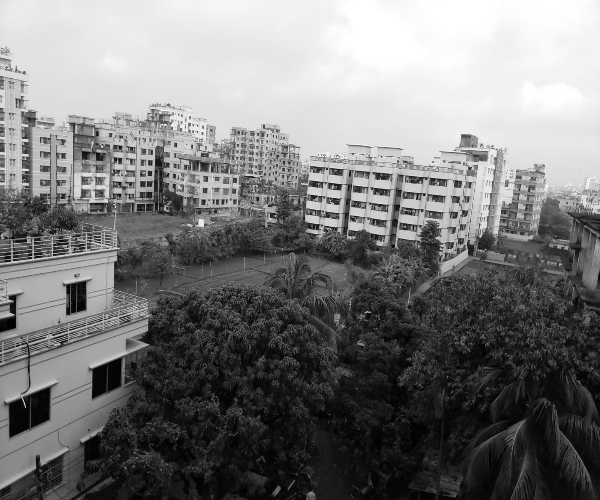

In [69]:
image = cv2.imread('/content/WhatsApp Image 2023-12-08 at 9.41.23 AM (1) - Copy.jpeg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (600, 500))
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

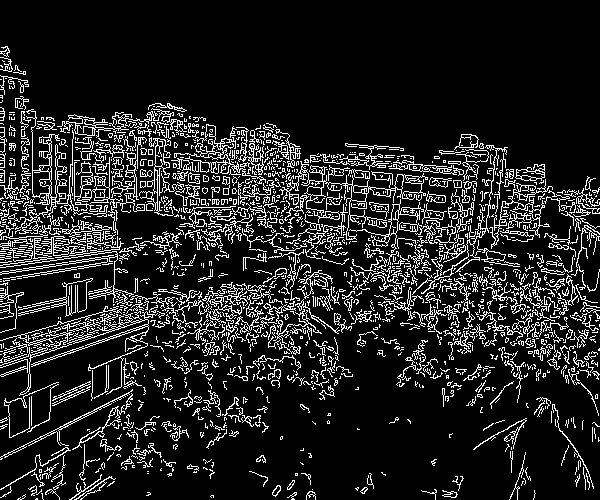

In [70]:
if image is not None:
    edges = cv2.Canny(image, 100, 200)
    cv2_imshow(edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Image not found or couldn't be loaded.")

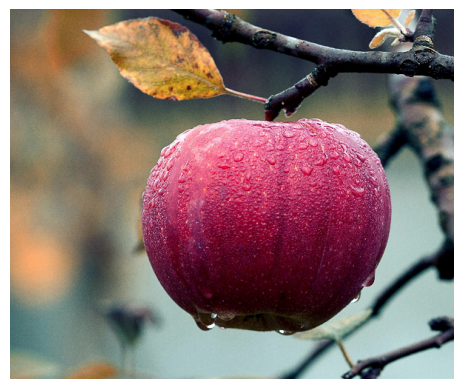

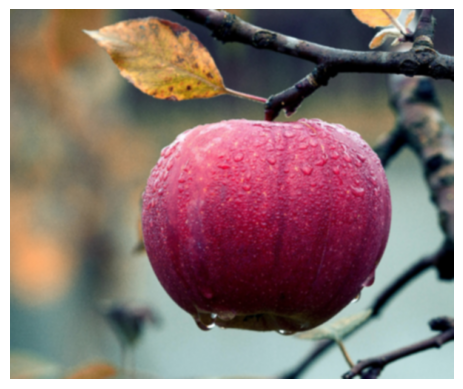

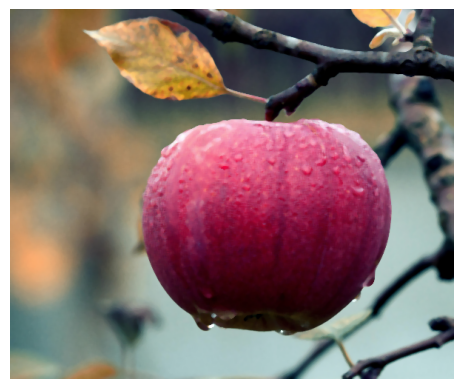

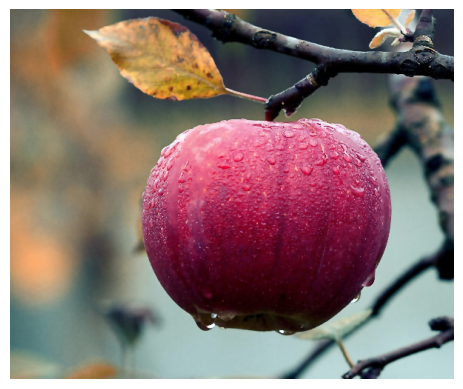

In [92]:
#Denosing image
image2 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
image2 = cv2.resize(image2, (600, 500))

#Gaussian blur to denoise the image
denoised_image = cv2.GaussianBlur(image2, (5, 5), -1)
denoised_image2 = cv2.medianBlur(image2,5)
denoised_image3 = cv2.bilateralFilter(image2, 5, 75, 75)

display_img(image2)
display_img(denoised_image)
display_img(denoised_image2)
display_img(denoised_image3)


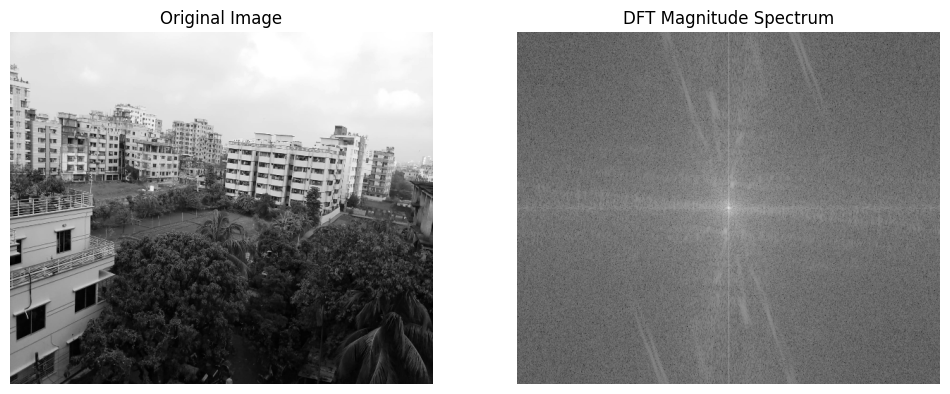

In [72]:
# Perform Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum (logarithmic scale for better visualization)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the original image and its DFT magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()

### Histogram color correction

Original


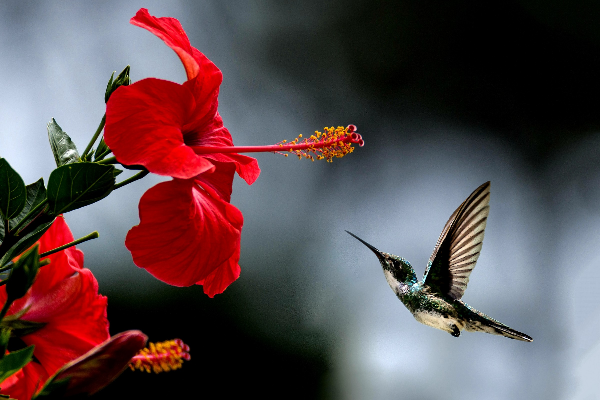

HSV


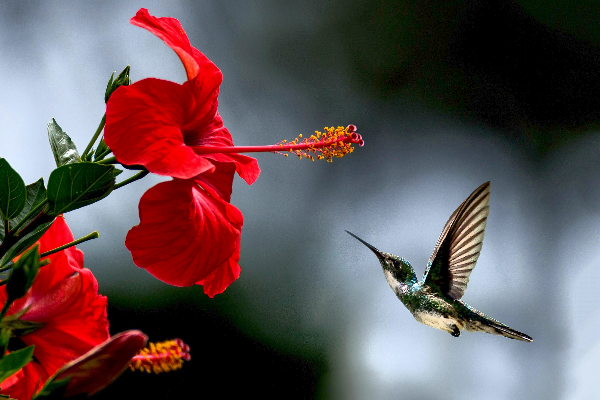

LAB IMG


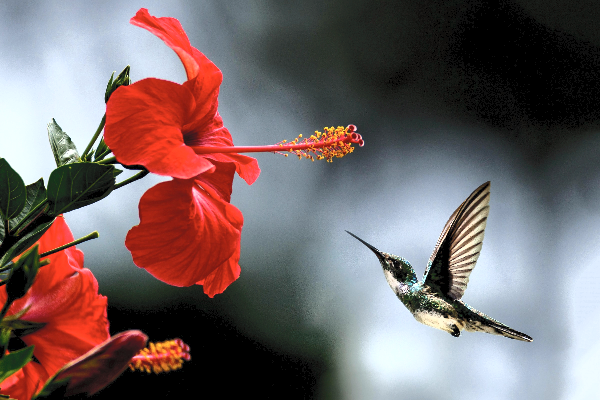

In [73]:
im3 = cv2.imread('/content/20190803_101711_optimized.jpg')
im3 = cv2.resize(im3, (600, 400))

# Convert the image to the LAB color space
lab_image = cv2.cvtColor(im3, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels (L - Lightness, A - Green to Red, B - Blue to Yellow)
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply histogram equalization to the L channel
l_channel_eq = cv2.equalizeHist(l_channel)

# Merge the equalized L channel with the original A and B channels
lab_eq_image = cv2.merge((l_channel_eq, a_channel, b_channel))

# Convert the equalized LAB image back to BGR color space
corrected_image = cv2.cvtColor(lab_eq_image, cv2.COLOR_LAB2BGR)
# another way,hsv hist correction
hsv = cv2.cvtColor(im3.copy(),cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
hsv_corrected = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
print('Original')
cv2_imshow( im3)
print('HSV')
cv2_imshow(hsv_corrected)
print('LAB IMG')
cv2_imshow(corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


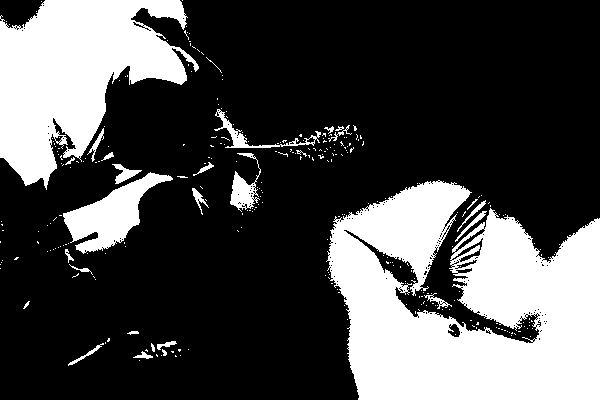

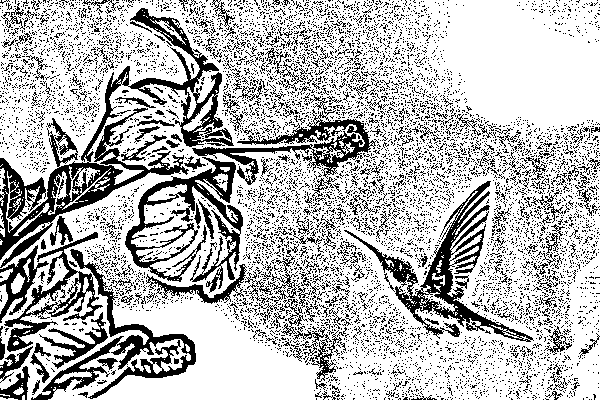

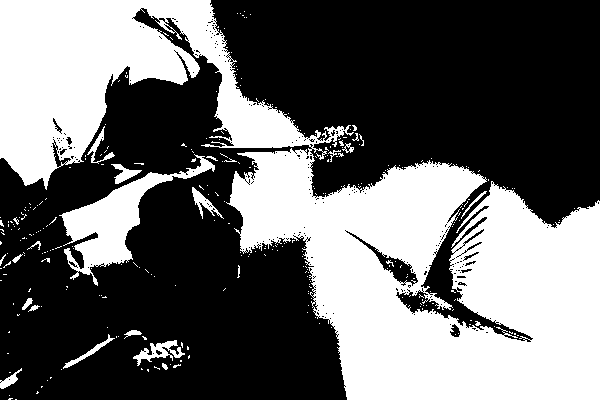

In [74]:
gray_image = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

# Binary Thresholding
_, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(binary_threshold)
cv2_imshow(adaptive_threshold)
cv2_imshow(otsu_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

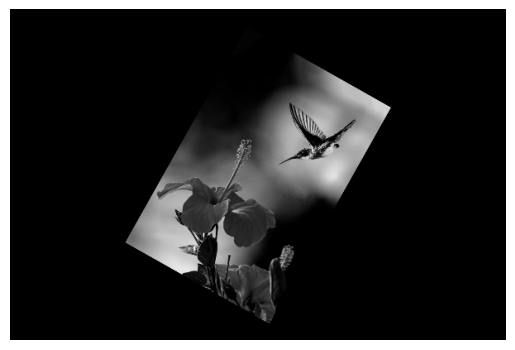

In [91]:
# Rotate an image
rows, cols = gray_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 60.58, 0.5)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (cols, rows))
display_img(rotated_image)

###corner detection


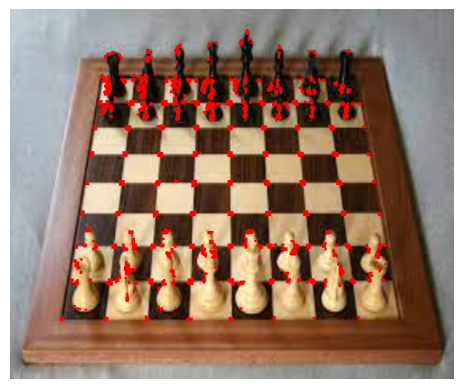

In [76]:
chess_img,chess_gray = load_img('/content/download.jpg')
chess_gray = np.float32(chess_gray)
dst = cv2.cornerHarris(chess_gray,blockSize=3,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
chess_img[dst > 0.01 * dst.max()] = [0,0,255]
display_img(chess_img)

### Edge detection


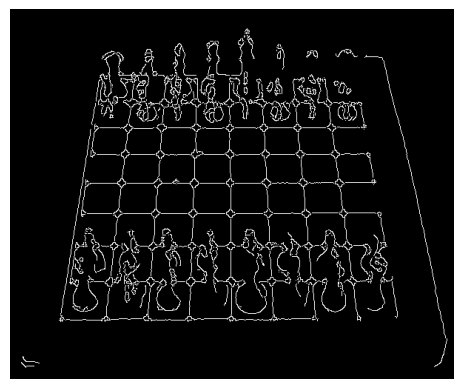

In [77]:
median = np.median(chess_img)
lower = int(max(0,0.7 *  median))
higher = int(min(255,1.30 *  median))
#we neet to blurr before edge detection
blured_chess = cv2.blur(chess_img,ksize=(5,5))
edges = cv2.Canny(blured_chess,threshold1=lower,threshold2 =  higher)
display_img(edges)

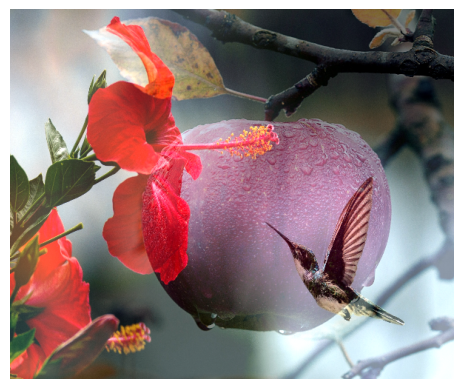

In [90]:
# Read the two images
ima1 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
ima2 = cv2.imread('/content/20190803_101711_optimized.jpg')

# Resize image2 to match the dimensions of image1 (optional, if needed)
ima2 = cv2.resize(ima2, (ima1.shape[1], ima1.shape[0]))

# Blending the images (using equal weightage for both images)
alpha = 0.5  # Weight for the first image
beta = 0.8   # Weight for the second image
gamma = 0    # Scalar added to each sum
blended_image = cv2.addWeighted(ima1, alpha, ima2, beta, gamma)
blended_image = cv2.resize(blended_image,(600,500))

display_img(blended_image)


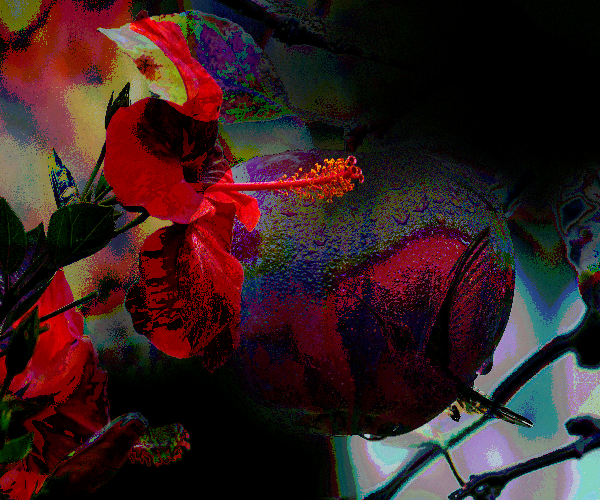

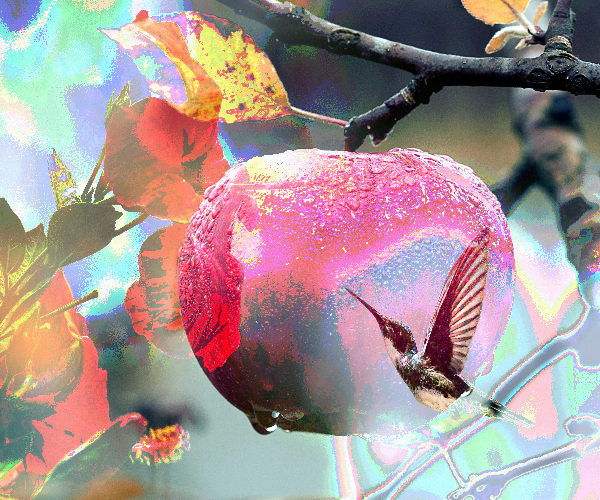

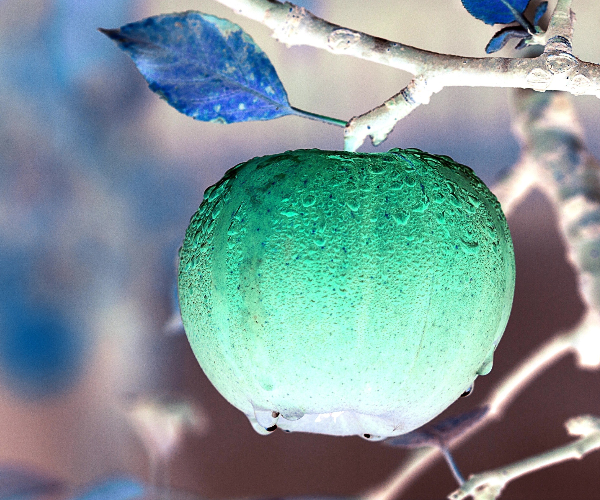

In [88]:
#Bitwise operation
ima1 = cv2.resize(ima1,(600,500))
ima2 = cv2.resize(ima2,(600,500))
bitwise_and = cv2.bitwise_and(ima1, ima2) #Highlights common areas or features present in both images.
bitwise_or = cv2.bitwise_or(ima1, ima2) #Combines areas or features present in either image.
bitwise_not = cv2.bitwise_not(ima1)

cv2_imshow(bitwise_and)
cv2_imshow(bitwise_or)
cv2_imshow(bitwise_not)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Object segmentation using GrabCut Algorithm:

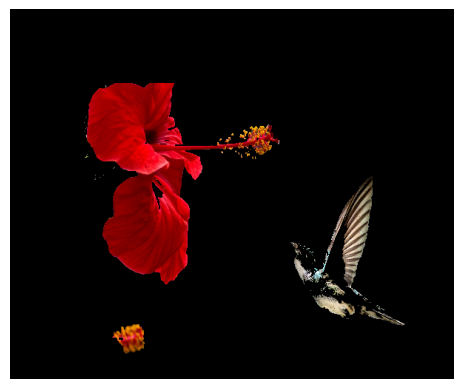

In [89]:
# Read the image
image5 = cv2.imread('/content/20190803_101711_optimized.jpg')
image5 = cv2.resize(image5,(600,500))

# Define a rectangle around the object you want to segment
rect = (100, 100, 450, 450)  # Format: (x, y, width, height)

# Initialize the mask
mask = np.zeros(image5.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image5, mask, rect, bgd_model, fgd_model, iterCount=6, mode=cv2.GC_INIT_WITH_RECT)

# Create a mask where 0 and 2 are considered the background and the rest as foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image5
result = image5 * mask2[:, :, np.newaxis]

display_img(result)


### Object segmentation using Watershed Algorithm:

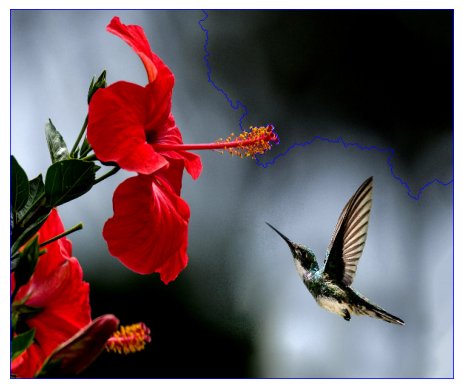

In [93]:
image5 = cv2.imread('/content/20190803_101711_optimized.jpg')
image5 = cv2.resize(image5,(600,500))

# Convert the image to grayscale
gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

# Apply thresholding or any preprocessing as needed
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify areas where we are uncertain
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Create markers for watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image5, markers)
image5[markers == -1] = [255, 0, 0]  # Mark boundary regions with blue color
display_img(image5)


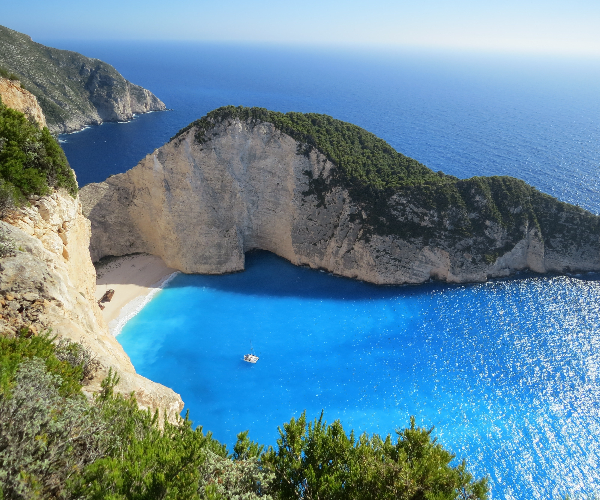

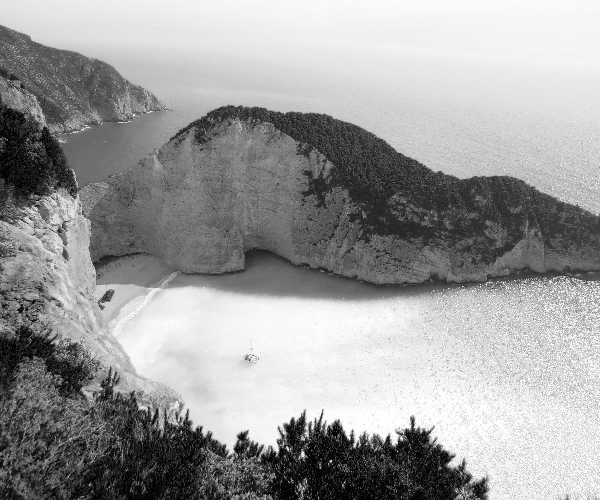

In [82]:
im7 = cv2.imread('/content/win 10.jpg')
im7 = cv2.resize(im7,(600,500))
b,g,r = cv2.split(im7)
color_img = cv2.merge((b,g,r))
cv2_imshow( color_img)
cv2_imshow(b)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
# blank_img = np.random.randint(0, 255, size=(512, 512, 3), dtype=np.uint8)
# blank_img = np.random.rand(512, 512, 3).astype(np.float32)
# plt.imshow(blank_img)

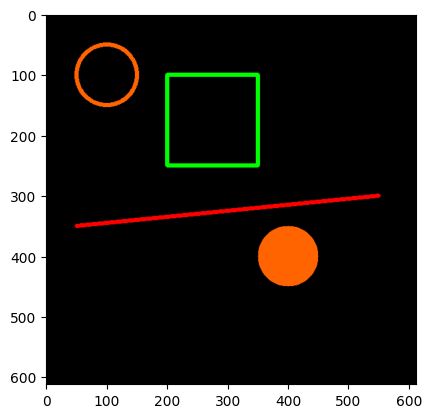

In [84]:
bimg = np.zeros(shape = (612,612,3),dtype=np.int32)
cv2.rectangle(bimg,pt1=(200,100),pt2=(350,250),color =(0,255,0),thickness = 5)
cv2.line(bimg,pt1=(50,350),pt2=(550,300),color =(255,0,0),thickness = 5)
cv2.circle(bimg,center=(100,100),radius=50,color =(255,100,0),thickness = 5)
cv2.circle(bimg,center=(400,400),radius=50,color =(255,100,0),thickness = -1)
plt.imshow(bimg)

In [85]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Transform the 1D array into a 3D array with shape (-1, 1, 2)
three_d_array = arr.reshape(-1, 1, 2)
three_d_array

array([[[ 1,  2]],

       [[ 3,  4]],

       [[ 5,  6]],

       [[ 7,  8]],

       [[ 9, 10]],

       [[11, 12]]])

Gaussian Kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


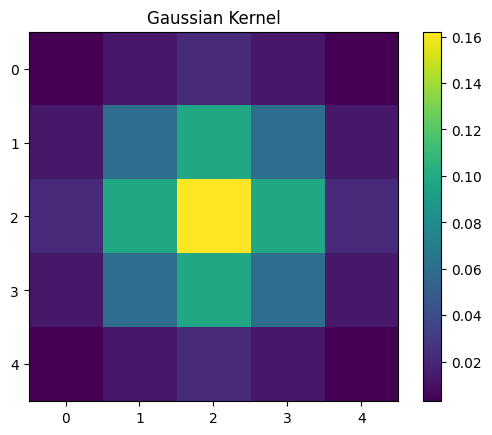

In [95]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

size = 5  # Kernel size (e.g., 5x5)
sigma = 1  # Standard deviation

kernel = gaussian_kernel(size, sigma)
print("Gaussian Kernel:")
print(kernel)
# Visualize the Gaussian kernel as an image
plt.imshow(kernel, cmap='viridis', interpolation='none')
plt.title('Gaussian Kernel')
plt.colorbar()
plt.show()